In [35]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

In [2]:
robot = rtb.models.DH.Panda()

# Display the Denavit-Hartenberg parameters of the robot
print("Denavit-Hartenberg Parameters:")
print(robot)

Denavit-Hartenberg Parameters:
DHRobot: Panda (by Franka Emika), 7 joints (RRRRRRR), dynamics, geometry, modified DH parameters
┌─────────┬────────┬─────┬───────┬─────────┬────────┐
│  aⱼ₋₁   │  ⍺ⱼ₋₁  │ θⱼ  │  dⱼ   │   q⁻    │   q⁺   │
├─────────┼────────┼─────┼───────┼─────────┼────────┤
│     0.0 │   0.0° │  q1 │ 0.333 │ -166.0° │ 166.0° │
│     0.0 │ -90.0° │  q2 │   0.0 │ -101.0° │ 101.0° │
│     0.0 │  90.0° │  q3 │ 0.316 │ -166.0° │ 166.0° │
│  0.0825 │  90.0° │  q4 │   0.0 │ -176.0° │  -4.0° │
│ -0.0825 │ -90.0° │  q5 │ 0.384 │ -166.0° │ 166.0° │
│     0.0 │  90.0° │  q6 │   0.0 │   -1.0° │ 215.0° │
│   0.088 │  90.0° │  q7 │ 0.107 │ -166.0° │ 166.0° │
└─────────┴────────┴─────┴───────┴─────────┴────────┘

┌──────┬───────────────────────────────────────┐
│ tool │ t = 0, 0, 0.1; rpy/xyz = -45°, 0°, 0° │
└──────┴───────────────────────────────────────┘

┌──────┬─────┬────────┬─────┬───────┬─────┬───────┬──────┐
│ name │ q0  │ q1     │ q2  │ q3    │ q4  │ q5    │ q6   │
├──────┼───

### 2. Fill in the parameters of the robot model (in the example, filled in for the Panda robot)

In [3]:
print(robot.links[0].dyn())  # initial dynamic parameters of the first link

m     =         5 
r     =         0        0        0 
        |      0.7 -0.00014   0.0068 | 
I     = | -0.00014     0.71    0.019 | 
        |   0.0068    0.019   0.0091 | 
Jm    =         0 
B     =         0 
Tc    =         0(+)        0(-) 
G     =         1 
qlim  =      -2.9 to      2.9


In [4]:
for i in range(len(robot.links)):
    print(robot.links[i].m)  

4.970684
0.646926
3.228604
3.587895
1.225946
1.666555
0.735522


In [5]:
for i in range(len(robot.links)):
    print(robot.links[i].r)  

[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]


In [6]:
for i in range(len(robot.links)):
    print(robot.links[i].I)  

[[ 7.0337e-01 -1.3900e-04  6.7720e-03]
 [-1.3900e-04  7.0661e-01  1.9169e-02]
 [ 6.7720e-03  1.9169e-02  9.1170e-03]]
[[ 0.007962 -0.003925  0.010254]
 [-0.003925  0.02811   0.000704]
 [ 0.010254  0.000704  0.025995]]
[[ 0.037242 -0.004761 -0.011396]
 [-0.004761  0.036155 -0.012805]
 [-0.011396 -0.012805  0.01083 ]]
[[ 0.025853  0.007796 -0.001332]
 [ 0.007796  0.019552  0.008641]
 [-0.001332  0.008641  0.028323]]
[[ 0.035549 -0.002117 -0.004037]
 [-0.002117  0.029474  0.000229]
 [-0.004037  0.000229  0.008627]]
[[ 0.001964  0.000109 -0.001158]
 [ 0.000109  0.004354  0.000341]
 [-0.001158  0.000341  0.005433]]
[[ 0.012516 -0.000428 -0.001196]
 [-0.000428  0.010027 -0.000741]
 [-0.001196 -0.000741  0.004815]]


In [7]:
for i in range(len(robot.links)):
    print(robot.links[i].Jm)  

0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [8]:
for i in range(len(robot.links)):
    print(robot.links[i].B)  

0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [9]:
for i in range(len(robot.links)):
    print(robot.links[i].Tc)  

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


In [10]:
for i in range(len(robot.links)):
    print(robot.links[i].G)  

1
1
1
1
1
1
1


In [11]:
for i in range(len(robot.links)):
    print(robot.links[i].qlim)  

[-2.8973  2.8973]
[-1.7628  1.7628]
[-2.8973  2.8973]
[-3.0718 -0.0698]
[-2.8973  2.8973]
[-0.0175  3.7525]
[-2.8973  2.8973]


### 3. Set the initial and final positions of the robot and plot them

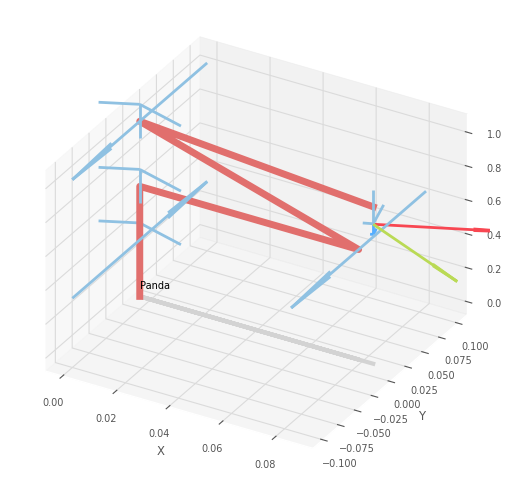

<Figure size 640x480 with 0 Axes>

In [12]:
q_start = [0, 0, 0, 0, 0, 0, 0]
robot.plot(q_start)
plt.show()

### 4. Solve forward Kinematics

In [13]:
T_start = robot.fkine(q_start)
print(T_start)

   0.7071    0.7071    0         0.088     
   0.7071   -0.7071    0         0         
   0         0        -1         0.823     
   0         0         0         1         



### 5. Construct the manipulator's workspace under the given joint constraints.

In [30]:
n = 10  # Количество точек по каждой оси
i = 0  # Просто счетчик
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(5)]  # Записываем пределы перемещения для первых 5 звеньев
pose = np.zeros([3,n**5])  # Создаем пустой массив для записи данных

In [ ]:
# Проходимся перебором по каждой точке
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            for q4 in move[3]:
                for q5 in move[4]:
                    Tt = robot.fkine([q1,q2,q3,q4,q5,0,0])  # Решаем ПЗК, меняя только первые 5 обобщенных координаты
                    for j in range(3):
                        pose[j][i] = Tt.t[j]  # Сохраняем точку
                    i += 1

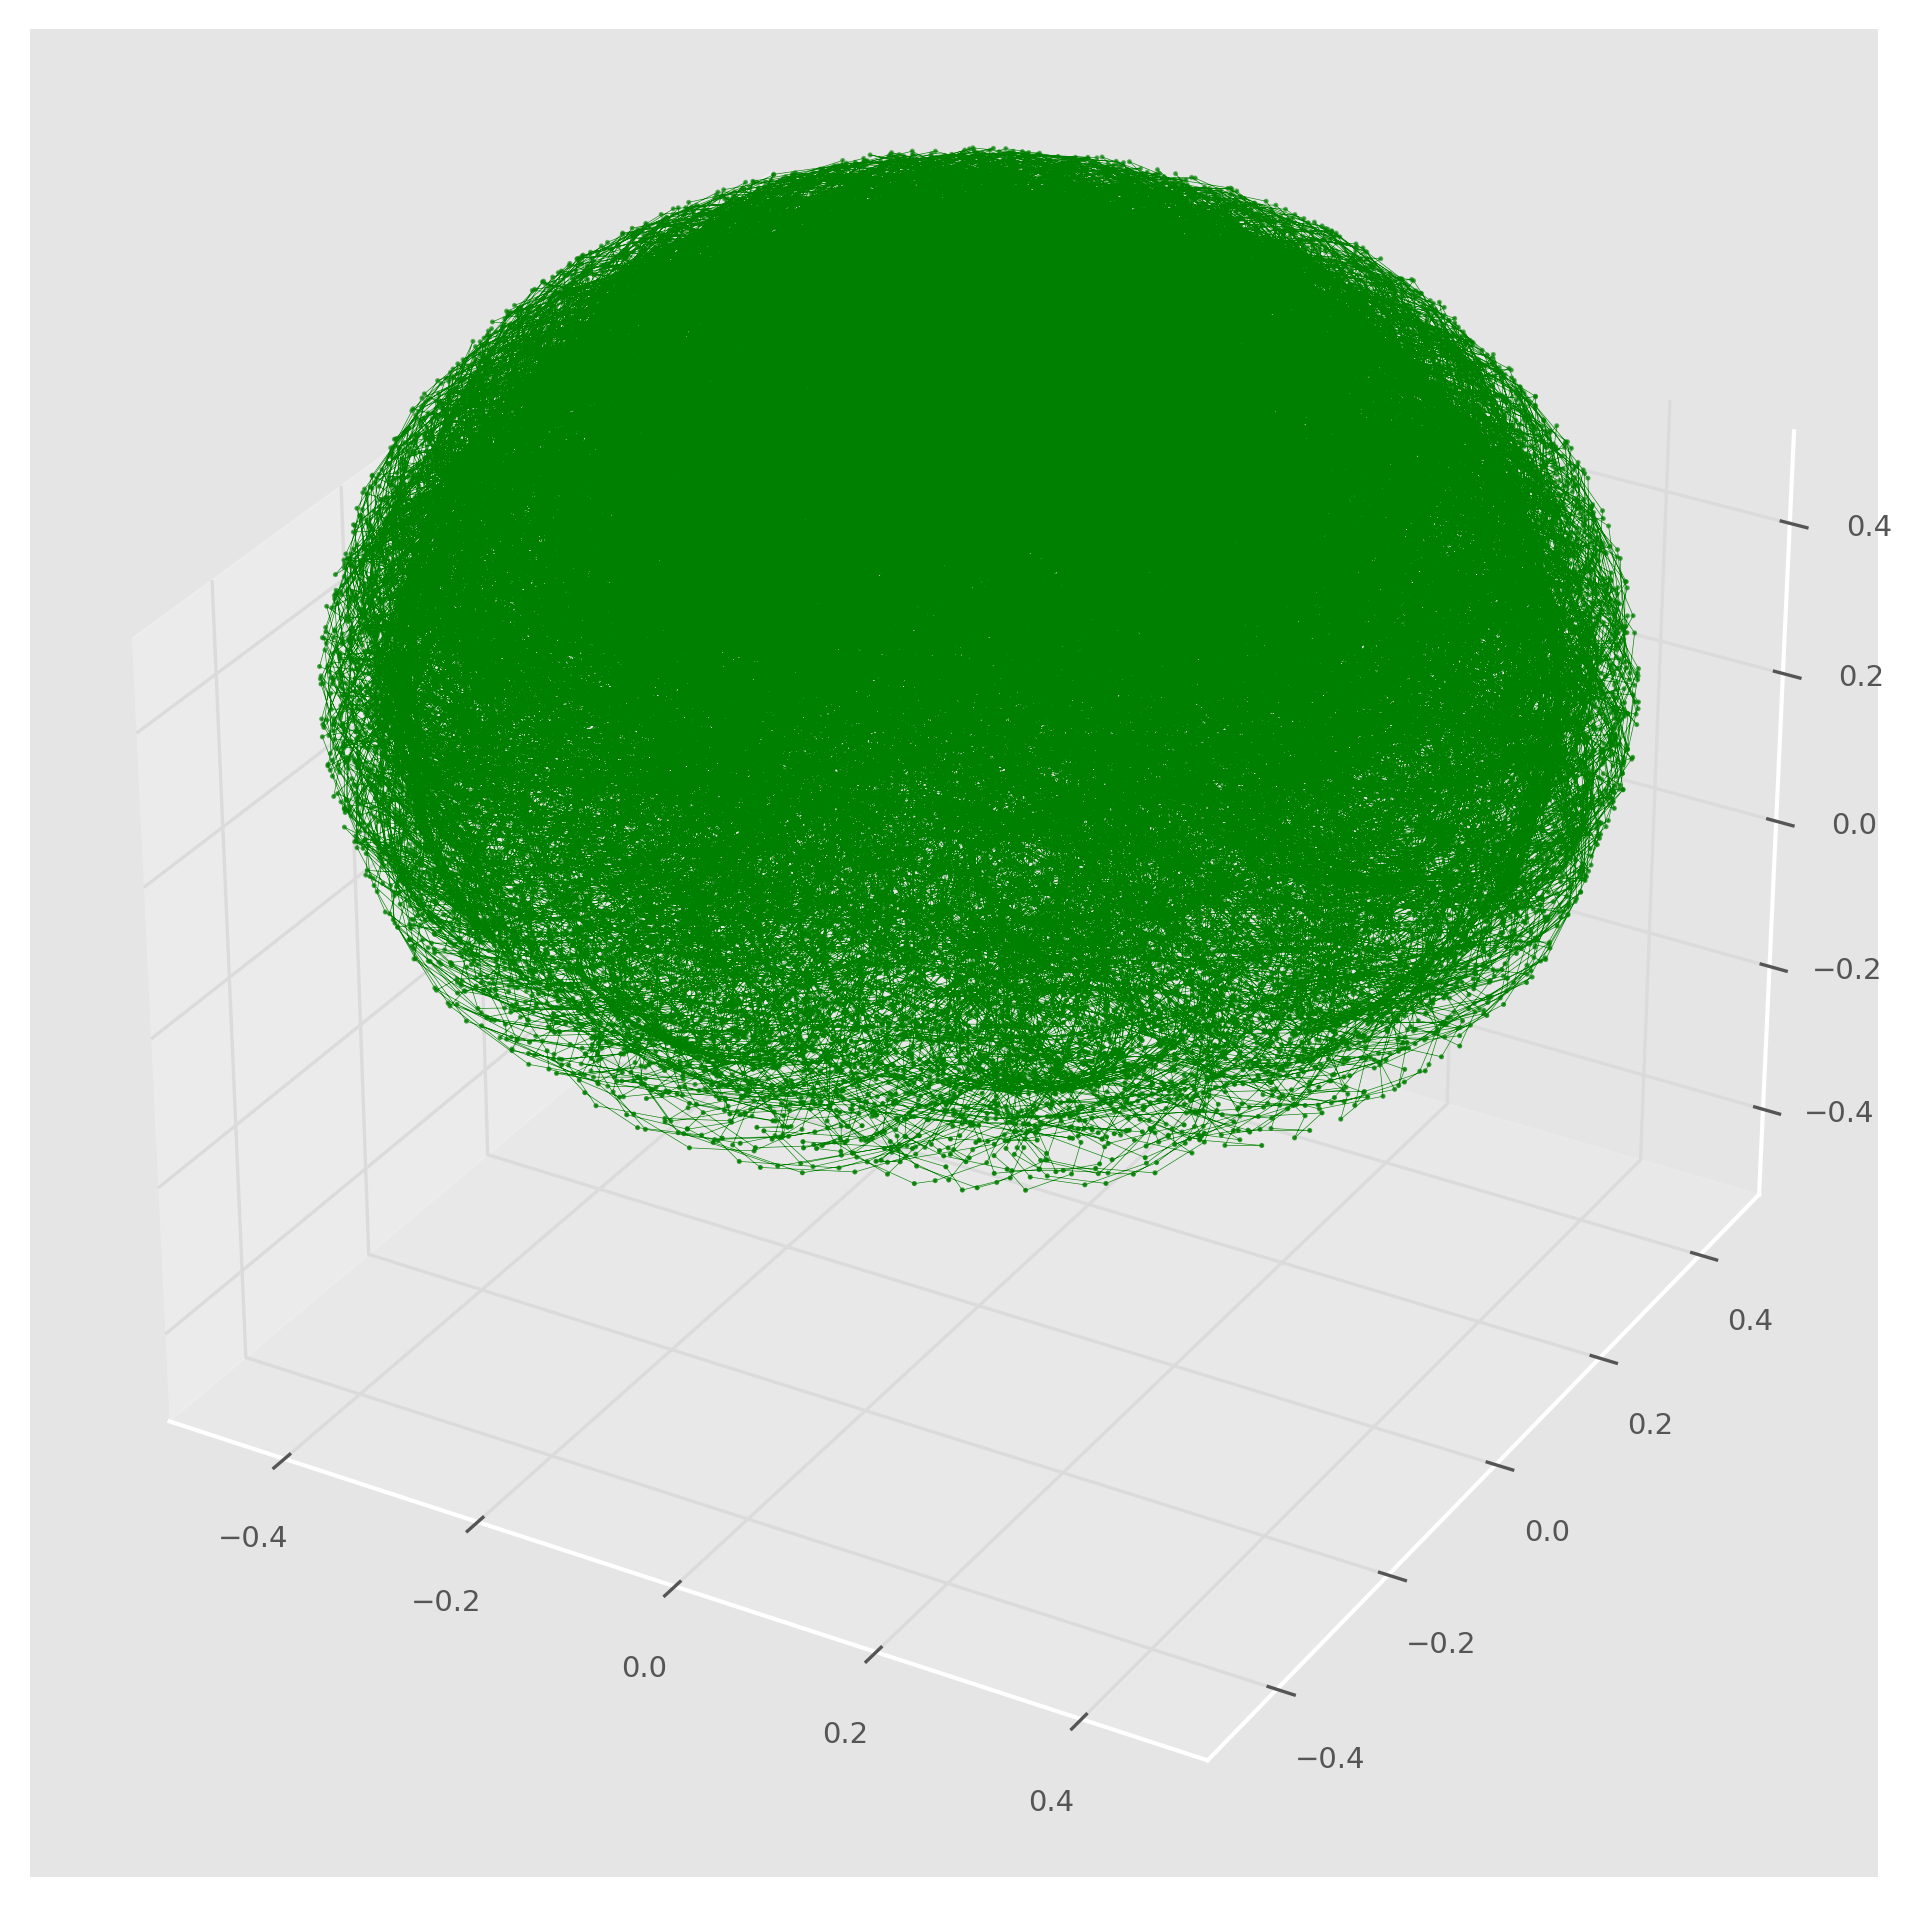

In [34]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='green', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='green')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
plt.show()

### 6. Select an end point within the workspace and solve the inverse kinematics problem for it.

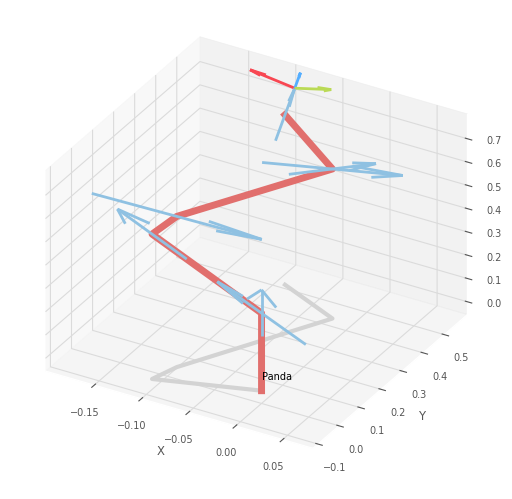

<Figure size 640x480 with 0 Axes>

In [37]:
point = [-pi/3,0.2,pi/4]
T_end = sb.transl(point)
q_end = robot.ikine_GN(T_end).q  # Есть другие методы, помимо ikine_GN
robot.plot(q_end)
plt.show()

### 7. Plan the trajectory between the initial and final positions of the manipulator's end-effector using at least three planning methods.

In [ ]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)

tr_jtraj = rtb.jtraj(q_start, q_end, time) # Joint-space trajectory between SE(3) poses

In [ ]:
# Scalar trapezoidal trajectory
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time) 

In [ ]:
# Generate scalar polynomial trajectory
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time) 

### 8. Plot graphs of position, velocity, and acceleration of the robot's joints during trajectory motion.

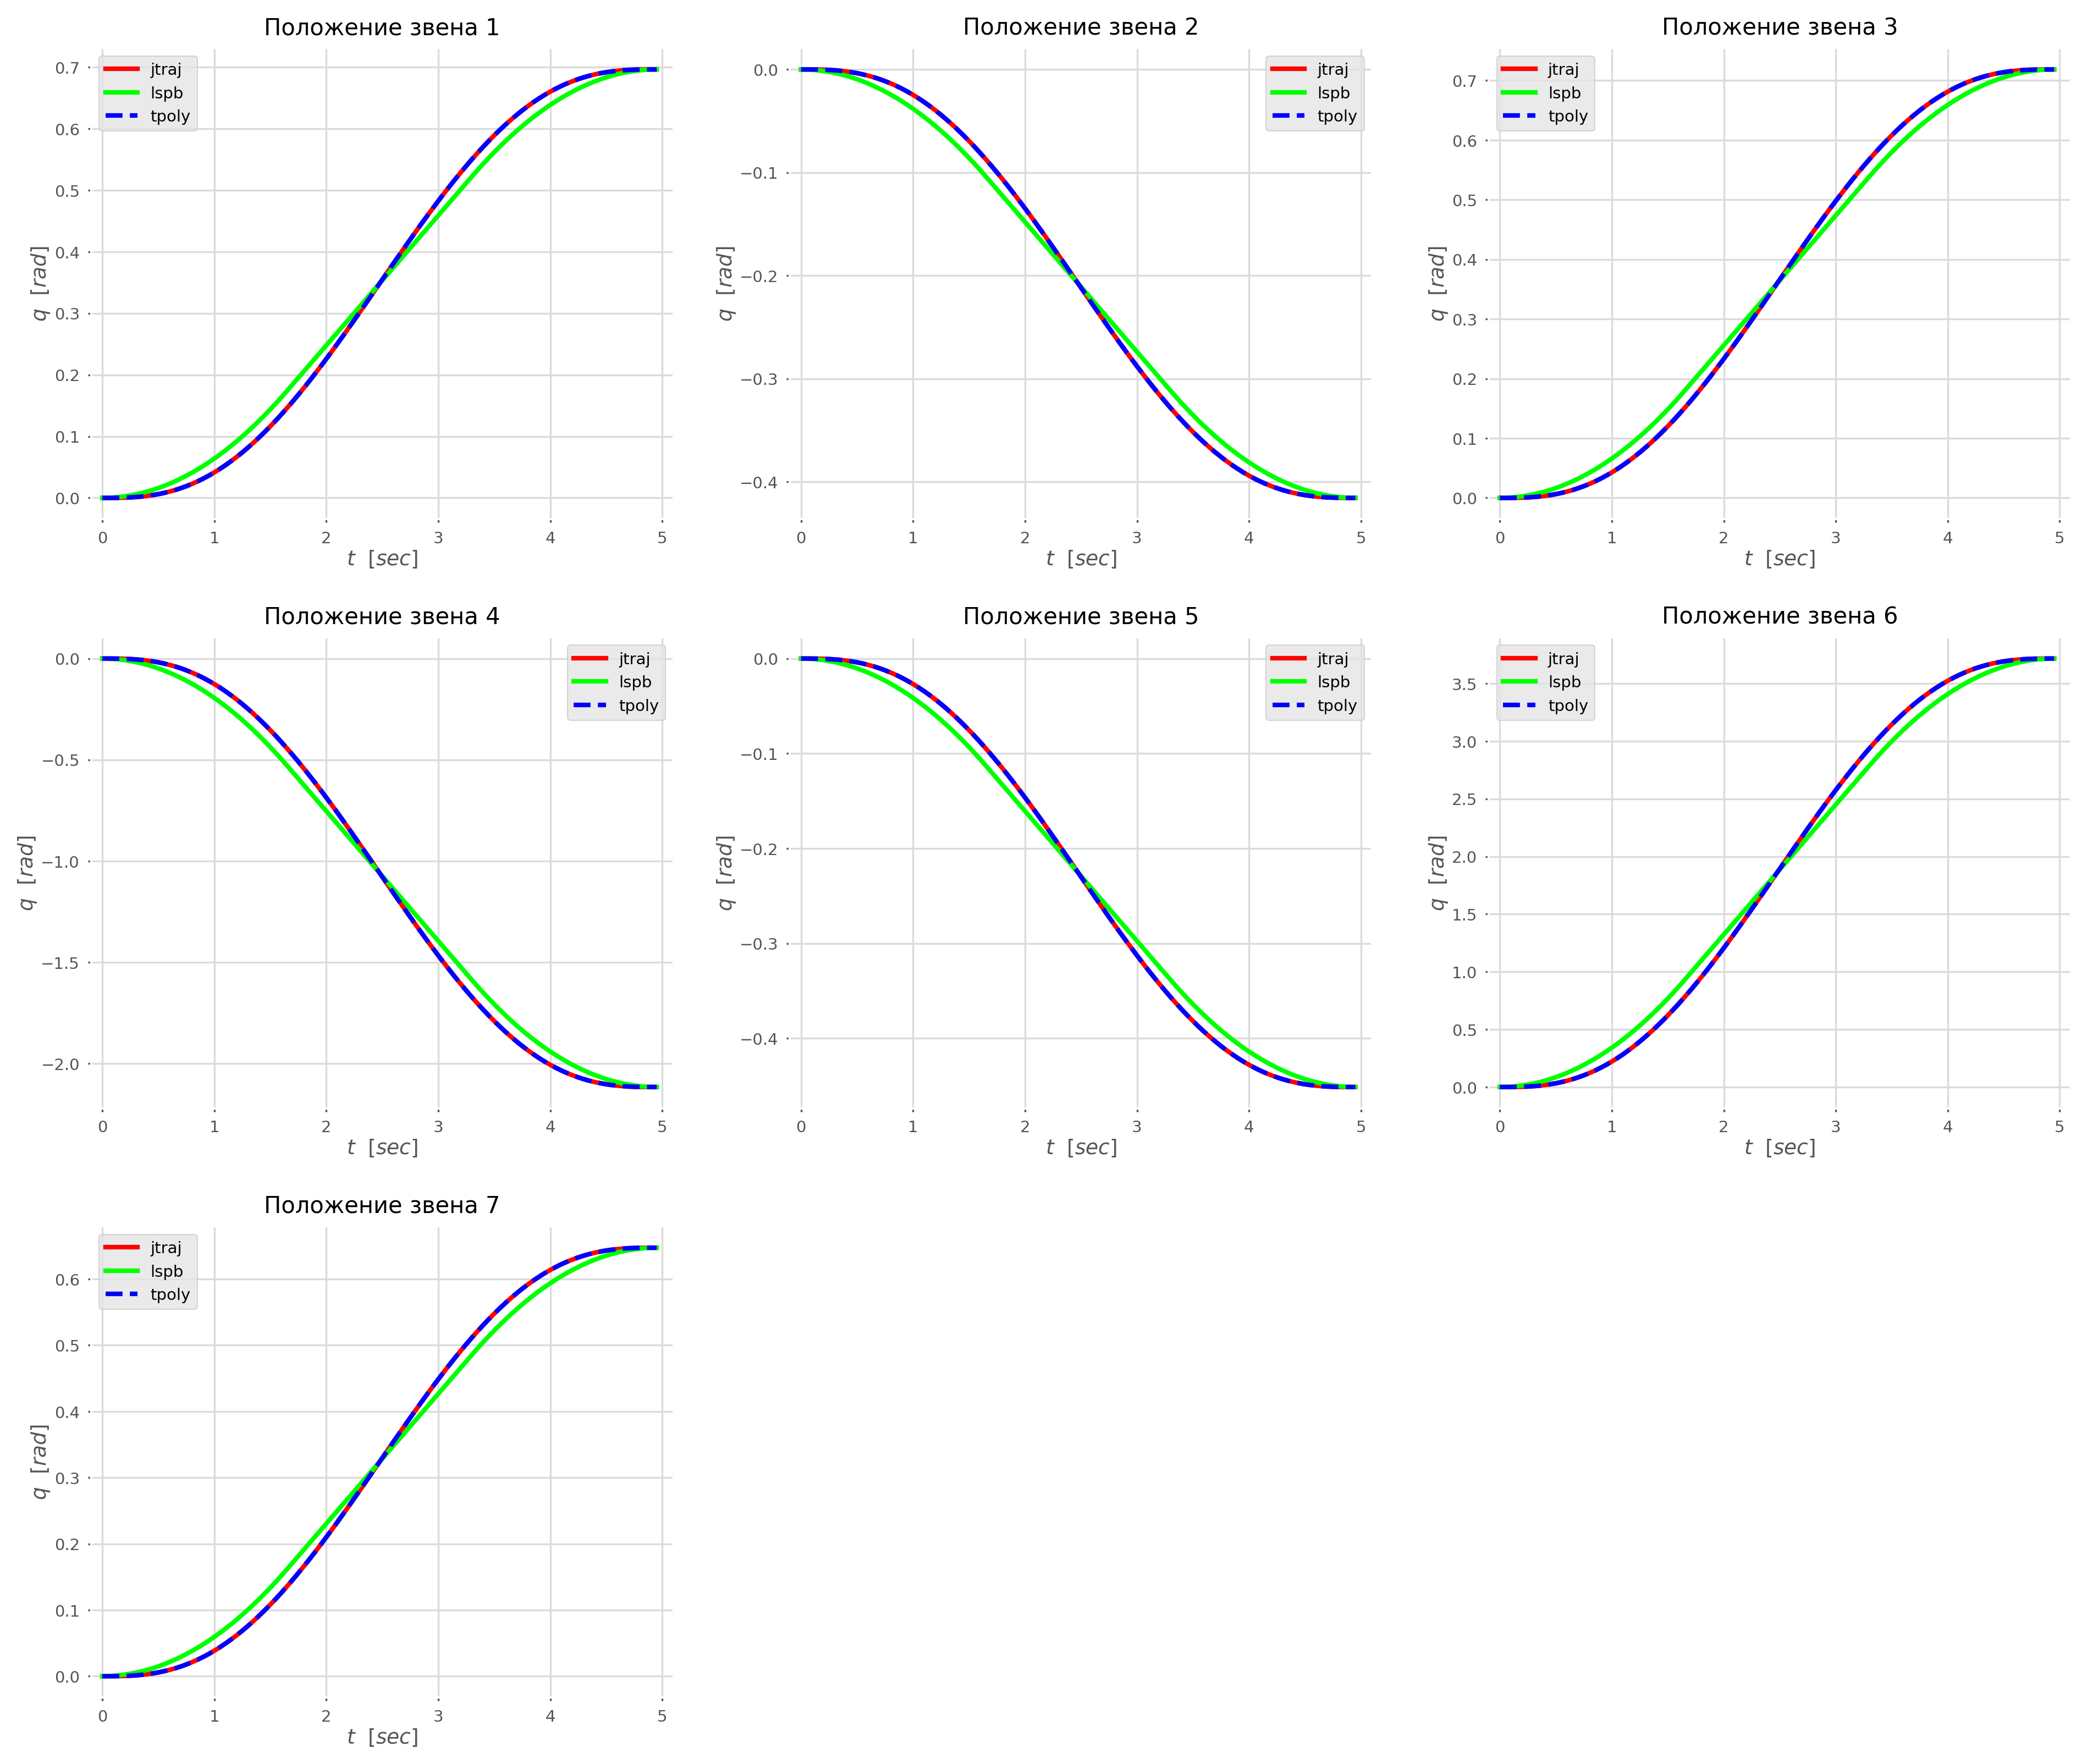

In [47]:
plt.figure(figsize=(12,10), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,8):
    plt.subplot(3,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.q[i][g-1] for i in range(len(tr_jtraj.q))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Положение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

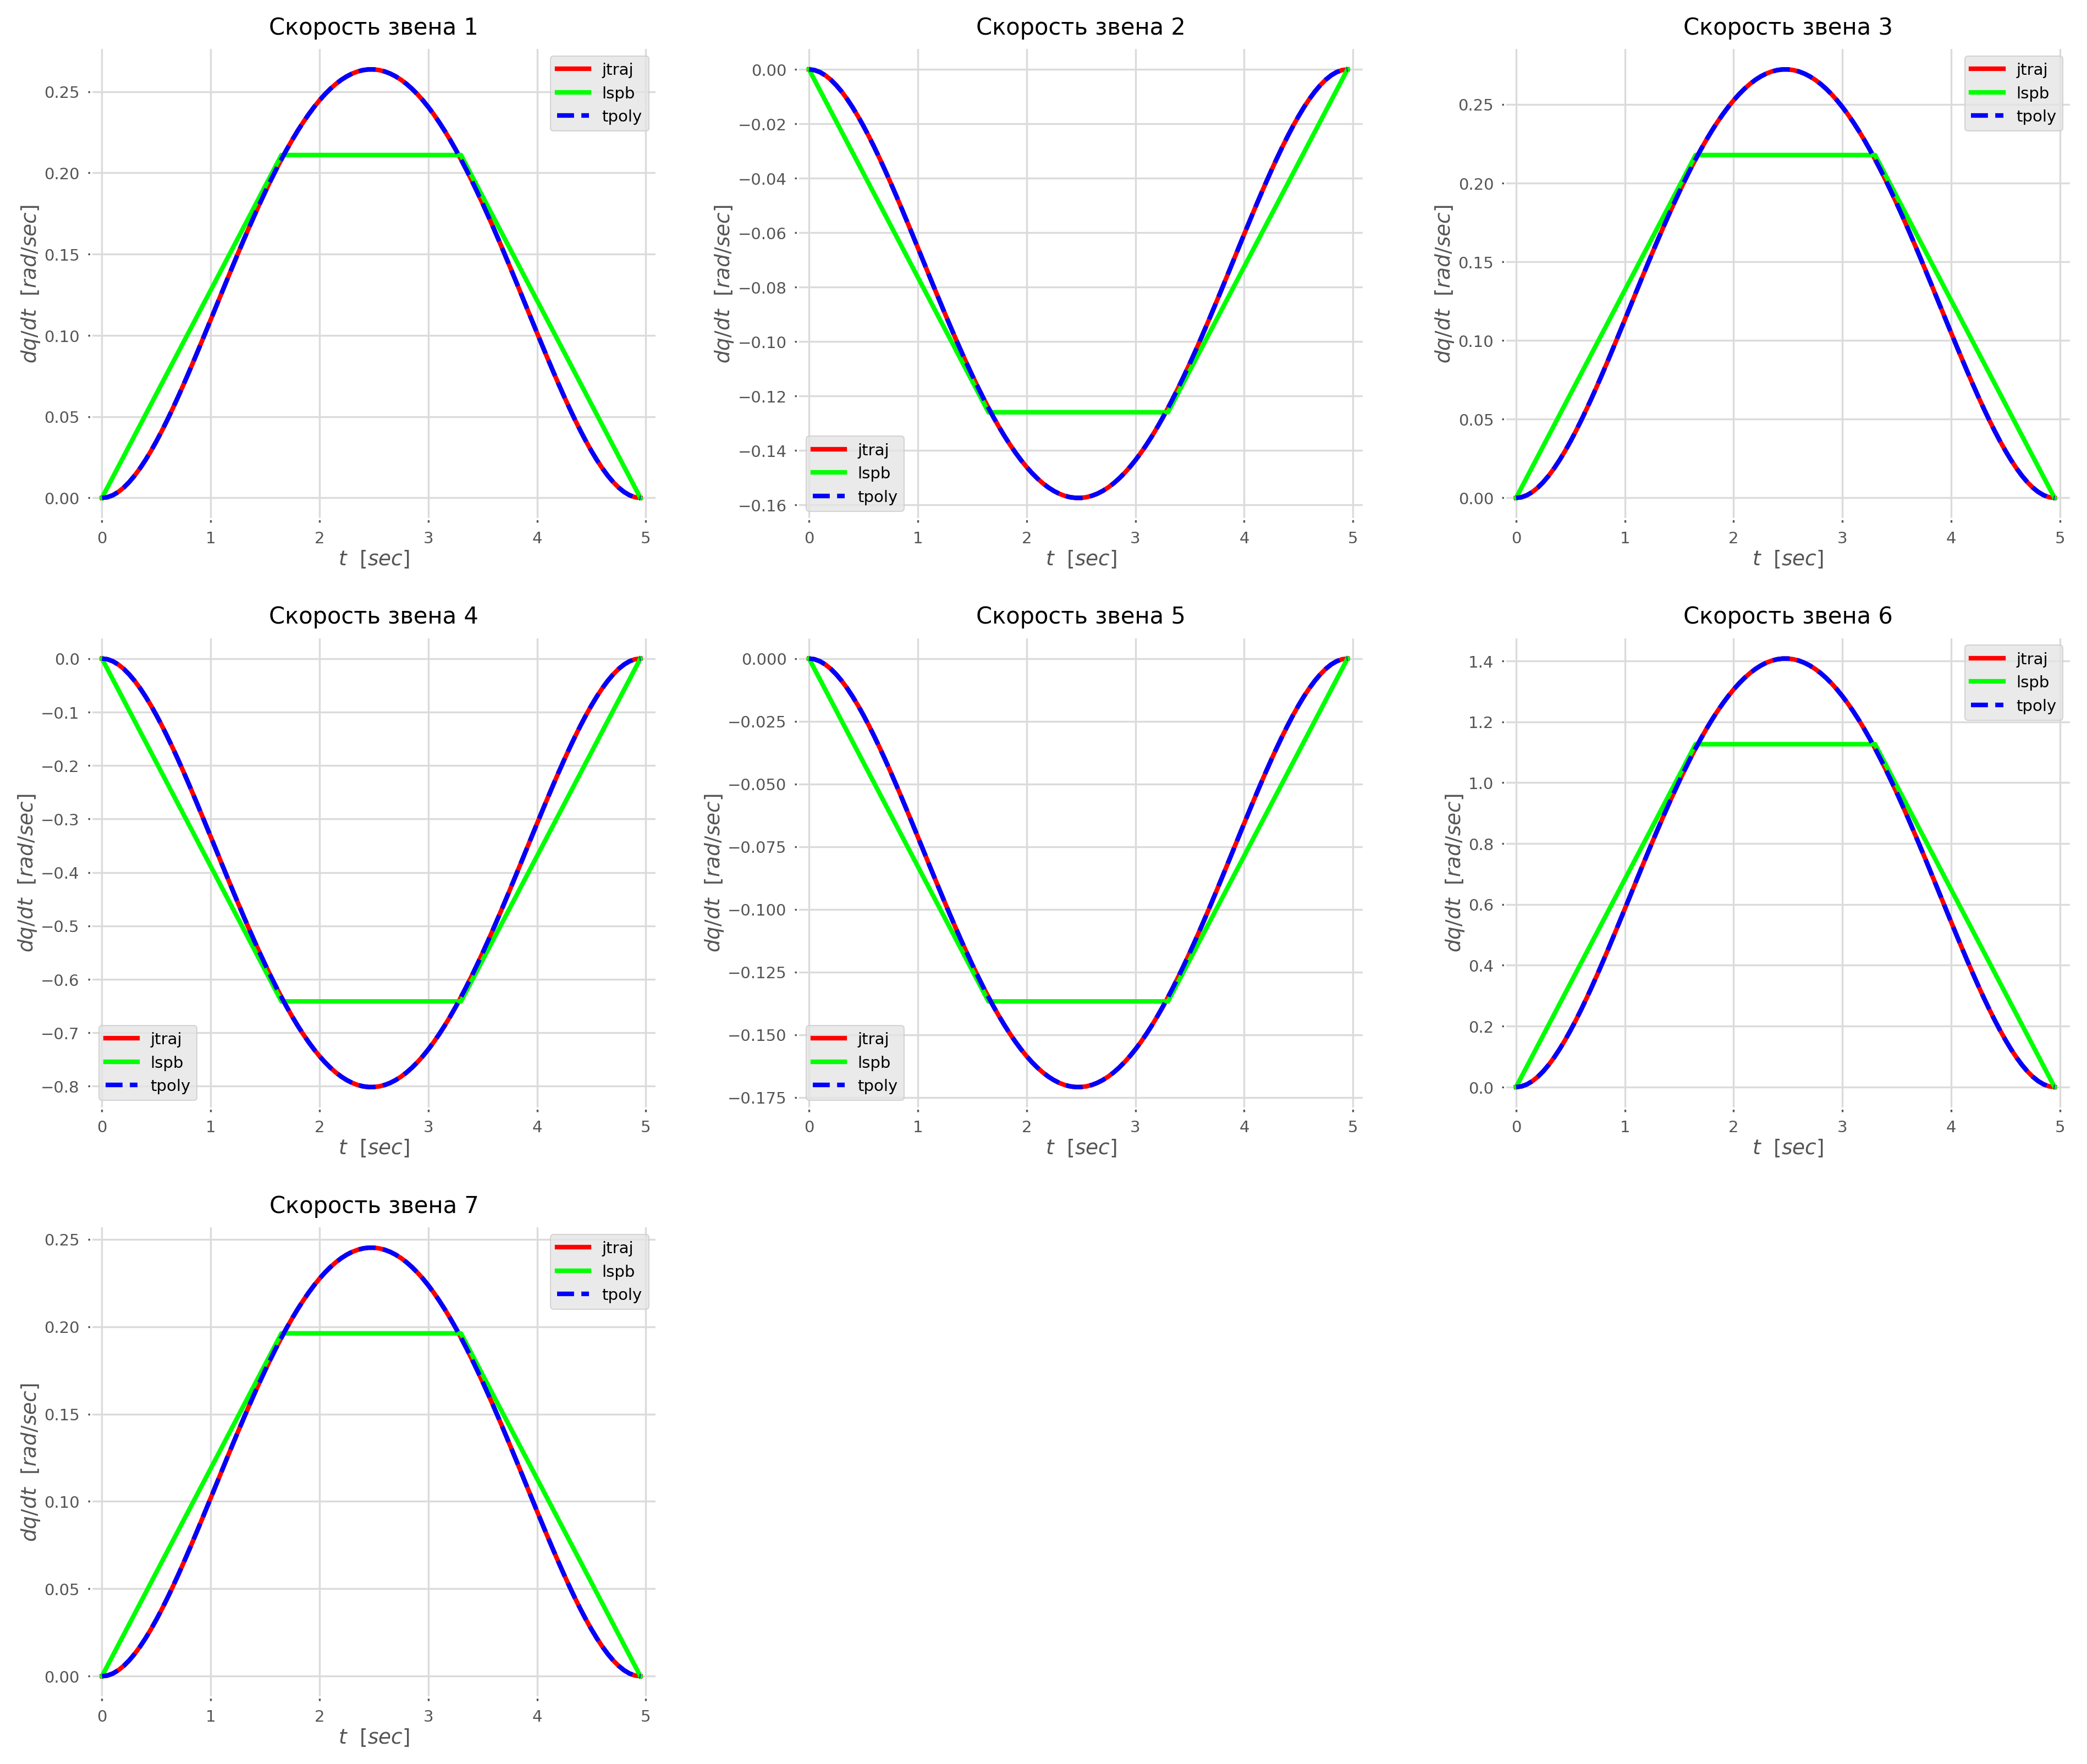

In [48]:
plt.figure(figsize=(12,10), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,8):
    plt.subplot(3,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qd[i][g-1] for i in range(len(tr_jtraj.qd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Скорость звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$dq/dt$  [$rad/sec$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

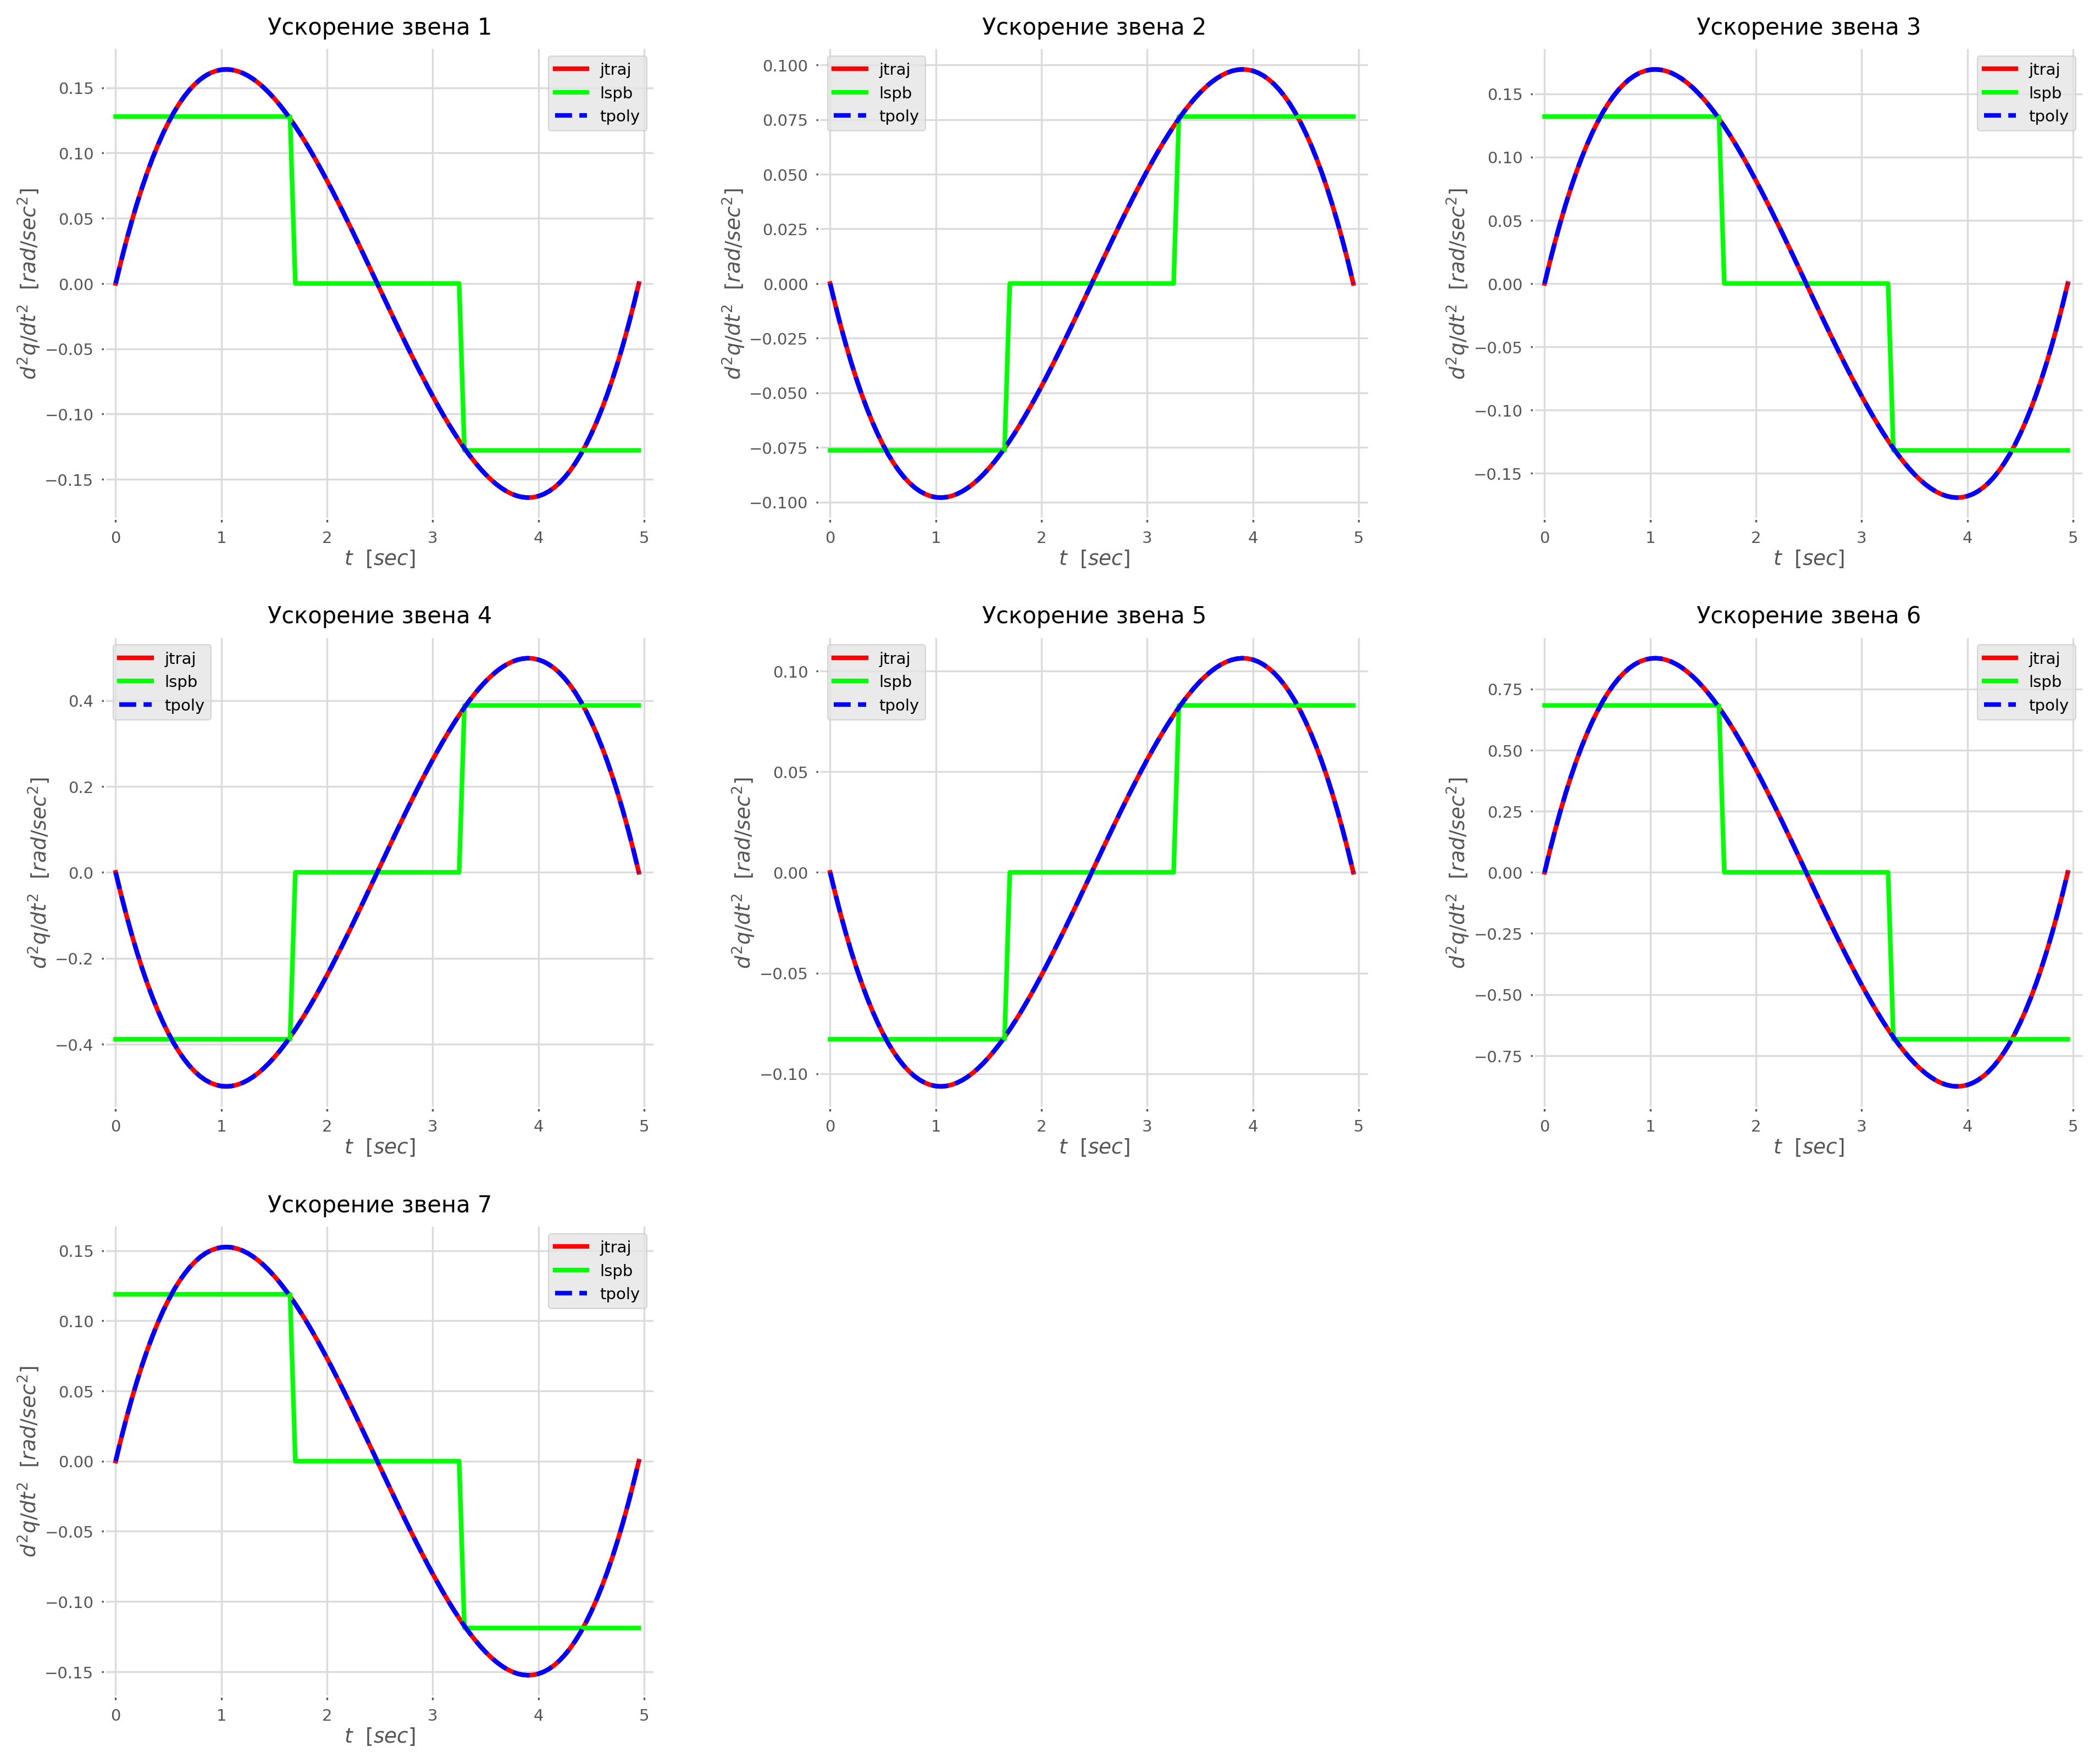

In [49]:
fig = plt.figure(figsize=(12,10), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,8):
    plt.subplot(3,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qdd[i][g-1] for i in range(len(tr_jtraj.qdd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Ускорение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/{sec}^2$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

## **Conclusion**
 + jtraj and mtraj(quintic) overlap perfectly in position, velocity, and acceleration. The 5th-order time law keeps acceleration continuous and jerk finite -> very smooth motion.
 + LSPB produces a trapezoidal velocity profile with a constant-speed plateau; acceleration is piece-wise constant, creating jerk spikes at the blend points -> less smooth.